In [1]:
from scripts.utils import utils
from scripts.model import OR_model
from scripts.resultData import ResultData

import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
df = pd.read_csv('dataset.csv')

/var/folders/g_/cf22fpvn29s5khzddc9pxmrc0000gn/T/ipykernel_95187/2591502319.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_weekn = df_service[weekn]
/var/folders/g_/cf22fpvn29s5khzddc9pxmrc0000gn/T/ipykernel_95187/2591502319.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_weekn = df_service[weekn]
/var/folders/g_/cf22fpvn29s5khzddc9pxmrc0000gn/T/ipykernel_95187/2591502319.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_weekn = df_service[weekn]
/var/folders/g_/cf22fpvn29s5khzddc9pxmrc0000gn/T/ipykernel_95187/2591502319.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_weekn = df_service[weekn]


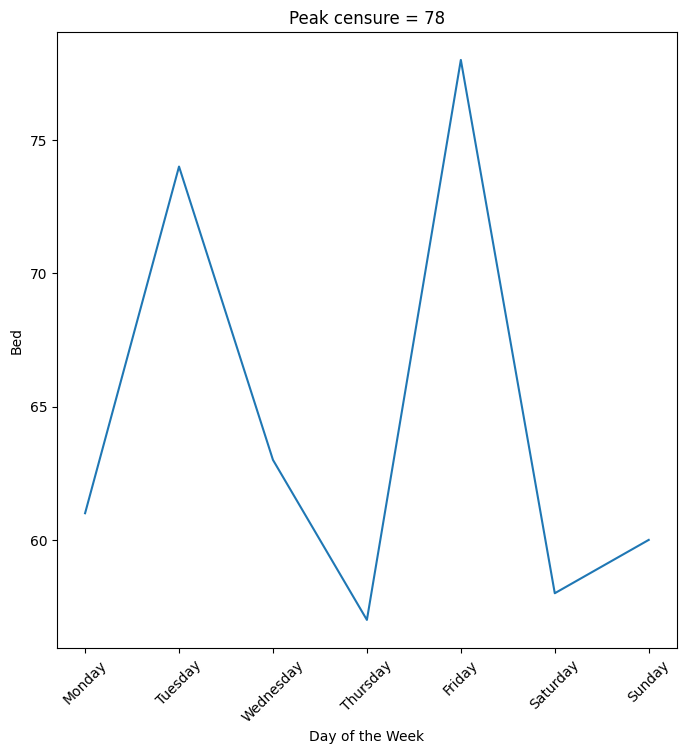

In [10]:
service = 3
df_service = df[df['Service ID'] == service]

total_weekday_daycount = [0] * 7

for i in range(1,5):
    weekn = df['Week Number'] == i
    df_weekn = df_service[weekn]
    
    weekday_daycount = []
    for d in range(1, 8):
        day_count = df_weekn[df_weekn['Weekday'] == d]['Beds'].sum()
        weekday_daycount.append(day_count)
    total_weekday_daycount = [total_weekday_daycount[j] + weekday_daycount[j] for j in range(7)]

avg_weekday_daycount = [int(count / 4) for count in total_weekday_daycount]



# Define labels for better readability
day_labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Count occurrences of each day
day_counts = avg_weekday_daycount

# Plot using Matplotlib
plt.figure(figsize=(8, 8))
plt.plot(range(7), day_counts)

# Set labels
plt.xticks(ticks=range(7), labels=day_labels, rotation=45)
plt.xlabel("Day of the Week")
plt.ylabel("Bed")
# plt.ylim(250, 350)
plt.title(f"Peak censure = {max(avg_weekday_daycount)}")

# Show plot
plt.show()

In [12]:
def readData(pre=True):
    print("\n\n", "-"*10, "Reading data", "-"*10)
    df = pd.read_csv('dataset.csv')

    print("Data size:", df.shape)

    print("\n\n", "-"*10, "Do precalculations", "-"*10)
    start = time.time()

    utils_ = utils(df, pre=pre)

    print(f"Finish, uses {time.time() - start:.5f} seconds")

    return df, utils_



 ---------- Reading data ----------
Data size: (1456, 7)


 ---------- Do precalculations ----------
Finish, uses 0.00000 seconds


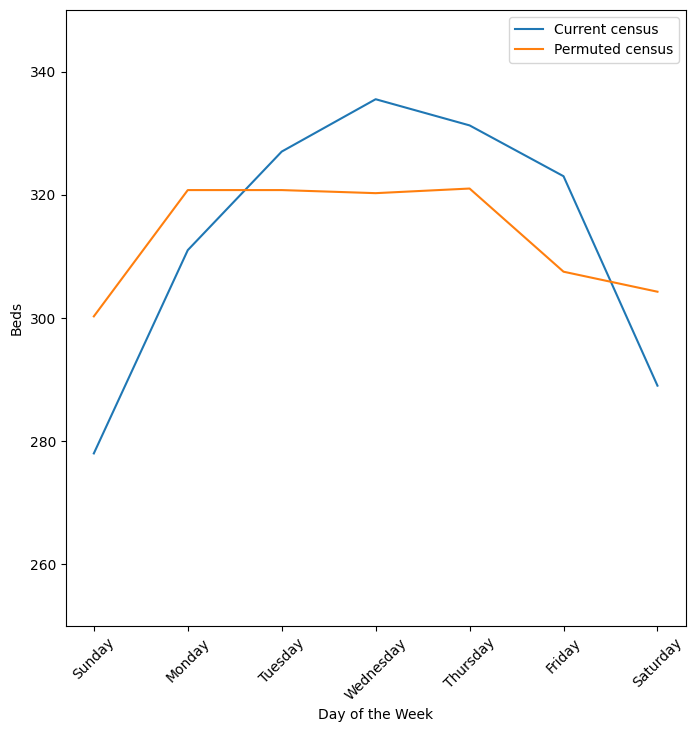

In [18]:
df, utils_ = readData(pre=False)

load_result = ResultData(filepath='./saves/result_P4_a0.csv',df=df, utils=utils_)
load_result.plot()